In [78]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

import cv2
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad, Adadelta

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Model
from tensorflow.keras.models import load_model

from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Tire Textures/training_data"
test_path = "C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Tire Textures/testing_data"

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=30)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=30, shuffle=False)

Found 703 images belonging to 2 classes.

Found 325 images belonging to 2 classes.


In [4]:
len(train_batches)

24

In [5]:
len(test_batches)

11

In [6]:
# DATA IS ALMOST BALANCED
print(len(train_batches.classes[train_batches.classes == 0]))
print(len(train_batches.classes[train_batches.classes == 1]))

327

376


# MODEL BUILDING

**CNN (CONVOLUTIONAL NEURAL NETWORK)**

In [48]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [49]:
model1 = Sequential([
    data_augmentation,
    layers.Conv2D(16, (3,3), 1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(128, (3,3), 1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(180, (3,3), 1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [50]:
model1.summary()

Model: "sequential_2"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


sequential_1 (Sequential)    (None, 224, 224, 3)       0         

_________________________________________________________________

conv2d (Conv2D)              (None, 224, 224, 16)      448       

_________________________________________________________________

max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         

_________________________________________________________________

conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      

_________________________________________________________________

max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         

_________________________________________________________________

conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     

_________________________________________________________________

max_pooling2d_2 (MaxPooling2 (None, 28

In [51]:
filepath = "C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/cnn-{epoch:02d}-{val_accuracy:.02f}.h5"
earlystop = EarlyStopping(monitor="val_loss", patience=40, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only = True, mode="max")
callback_list = [checkpoint, earlystop]

In [52]:
# Model Compilation
model1.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

In [53]:
# TRAINING THE MODEL ON TRAIN BATCHES AND VALIDATING THEM WITH THE TEST BATCHES

hist1 = model1.fit(train_batches, validation_data = test_batches, shuffle = True, batch_size = 30 , epochs = 100, callbacks=callback_list)

Epoch 1/100

24/24 [==============================] - 21s 778ms/step - loss: 1502.9668 - accuracy: 0.5263 - val_loss: 0.8431 - val_accuracy: 0.4185



Epoch 00001: val_accuracy improved from -inf to 0.41846, saving model to C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models\cnn-01-0.42.h5

Epoch 2/100

24/24 [==============================] - 18s 758ms/step - loss: 0.6952 - accuracy: 0.5306 - val_loss: 0.7118 - val_accuracy: 0.3538



Epoch 00002: val_accuracy did not improve from 0.41846

Epoch 3/100

24/24 [==============================] - 18s 751ms/step - loss: 0.6901 - accuracy: 0.5320 - val_loss: 0.7140 - val_accuracy: 0.3692



Epoch 00003: val_accuracy did not improve from 0.41846

Epoch 4/100

24/24 [==============================] - 18s 759ms/step - loss: 0.6785 - accuracy: 0.5761 - val_loss: 0.7279 - val_accuracy: 0.3692



Epoch 00004: val_accuracy did not improve from 0.41846

Epoch 5/100

24/24 [==============================] - 18s 747ms/step - 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


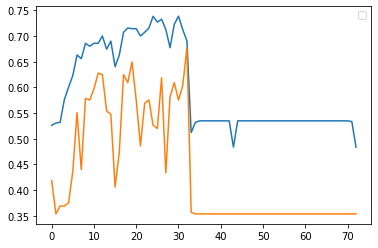

In [54]:
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])
plt.legend()
plt.show()

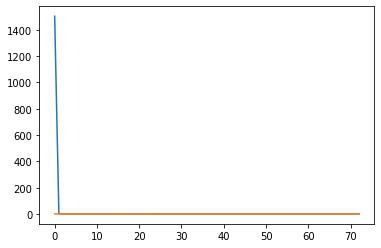

In [55]:
plt.plot(hist1.history["loss"])
plt.plot(hist1.history["val_loss"])

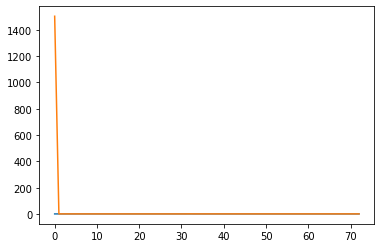

In [56]:
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["loss"])

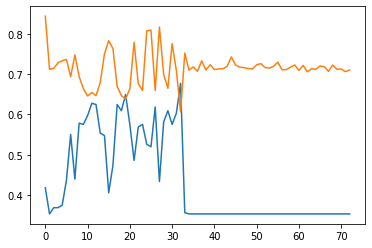

In [57]:
plt.plot(hist1.history["val_accuracy"])
plt.plot(hist1.history["val_loss"])

In [58]:
train_batches.class_indices

{'cracked': 0, 'normal': 1}

In [59]:
# PREDECTION OF MODEL ON TEST BATCHES

pred1 = model1.predict(test_batches)
prediction1 = [np.argmax(i) for i in pred1]

In [60]:
score1 = model1.evaluate(test_batches)

11/11 [==============================] - 8s 751ms/step - loss: 0.7101 - accuracy: 0.3538


In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
# cm = confusion_matrix(y_true = test_batches.classes, y_pred = prediction1)
# plot_confusion_matrix(cm = cm, classes = ["Cracked","Normal"])

In [63]:
# PRECISION
precision_score(test_batches.classes, prediction1)*100

35.38461538461539

In [64]:
# RECALL
recall_score(test_batches.classes, prediction1)*100

100.0

In [65]:
# F1 SCORE
f1_score(test_batches.classes, prediction1)*100

52.27272727272727

In [66]:
print(classification_report(test_batches.classes, prediction1, target_names=["Cracked","Normal"]))

              precision    recall  f1-score   support



     Cracked       0.00      0.00      0.00       210

      Normal       0.35      1.00      0.52       115



    accuracy                           0.35       325

   macro avg       0.18      0.50      0.26       325

weighted avg       0.13      0.35      0.18       325




In [ ]:
# train_pred1 = model1.predict(train_batches)
# train_prediction1 = [np.argmax(i) for i in train_pred1]
# accuracy_score(train_batches.classes, train_prediction1)*100   #Underfit

**VGG16**

In [8]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [9]:
vgg16_model.summary()

Model: "vgg16"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


input_1 (InputLayer)         [(None, 224, 224, 3)]     0         

_________________________________________________________________

block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      

_________________________________________________________________

block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     

_________________________________________________________________

block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         

_________________________________________________________________

block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     

_________________________________________________________________

block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    

_________________________________________________________________

block2_pool (MaxPooling2D)   (None, 56, 56, 1

In [10]:
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)
    
for layer in model2.layers:
    layer.trainable = False
    
model2.add(Dense(units=2, activation="softmax"))

In [11]:
model2.summary()

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      

_________________________________________________________________

block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     

_________________________________________________________________

block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         

_________________________________________________________________

block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     

_________________________________________________________________

block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    

_________________________________________________________________

block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         

_________________________________________________________________

block3_conv1 (Conv2D)        (None, 56, 

In [17]:
filepath = "C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/vgg16weights-{epoch:02d}-{val_accuracy:.02f}.h5"
earlystop = EarlyStopping(monitor="val_loss", patience=20, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only = True, mode="max")
callback_list = [checkpoint, earlystop]

In [18]:
# MODEL COMPILATION
model2.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
# TRAINING THE MODEL ON TRAIN BATCHES AND VALIDATING THEM WITH THE TEST BATCHES

hist2 = model2.fit(x = train_batches, validation_data = test_batches, shuffle = True, batch_size = 30 , epochs=50, callbacks=callback_list)
# model2.save("xea.h5")

Epoch 1/50

24/24 [==============================] - 20s 780ms/step - loss: 0.9686 - accuracy: 0.9047 - val_loss: 6.8212 - val_accuracy: 0.6862



Epoch 00001: val_accuracy improved from -inf to 0.68615, saving model to C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models\vgg16weights-01-0.69.h5

Epoch 2/50

24/24 [==============================] - 19s 806ms/step - loss: 0.3781 - accuracy: 0.9531 - val_loss: 2.1857 - val_accuracy: 0.8215



Epoch 00002: val_accuracy improved from 0.68615 to 0.82154, saving model to C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models\vgg16weights-02-0.82.h5

Epoch 3/50

24/24 [==============================] - 19s 812ms/step - loss: 0.1465 - accuracy: 0.9772 - val_loss: 2.6965 - val_accuracy: 0.7785



Epoch 00003: val_accuracy did not improve from 0.82154

Epoch 4/50

24/24 [==============================] - 19s 790ms/step - loss: 0.0716 - accuracy: 0.9858 - val_loss: 3.0337 - val_accuracy: 0.7908



Epo

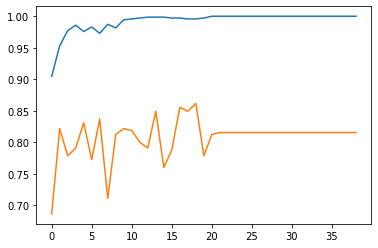

In [20]:
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])

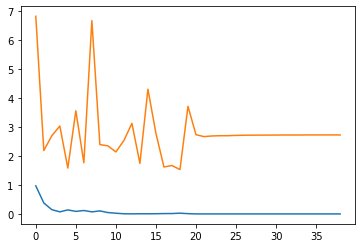

In [21]:
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_loss"])

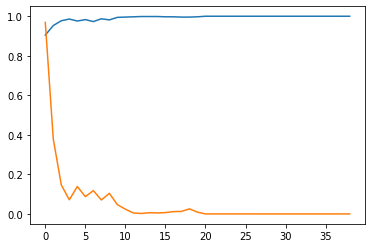

In [22]:
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["loss"])

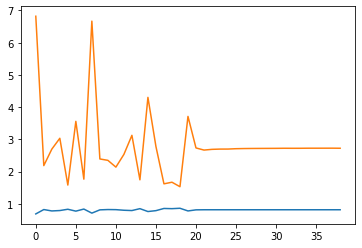

In [23]:
plt.plot(hist2.history["val_accuracy"])
plt.plot(hist2.history["val_loss"])

In [24]:
# PREDECTION OF MODEL ON TEST BATCHES

pred2 = model2.predict(test_batches)
prediction2 = [np.argmax(i) for i in pred2]

In [25]:
score2 = model2.evaluate(test_batches)

11/11 [==============================] - 8s 723ms/step - loss: 2.7242 - accuracy: 0.8154


Confusion matrix, without normalization

[[158  52]

 [  8 107]]


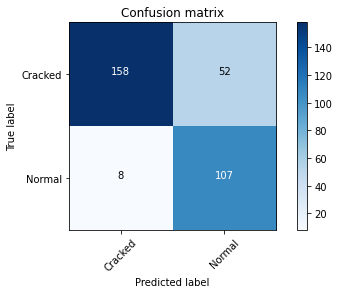

In [26]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = prediction2)
plot_confusion_matrix(cm = cm, classes = ["Cracked","Normal"])

In [27]:
# PRECISION
precision_score(test_batches.classes, prediction2)*100

67.29559748427673

In [28]:
# RECALL
recall_score(test_batches.classes, prediction2)*100

93.04347826086956

In [29]:
# F1 SCORE
f1_score(test_batches.classes, prediction2)*100

78.10218978102189

In [30]:
print(classification_report(test_batches.classes, prediction2, target_names=["Cracked","Normal"]))

              precision    recall  f1-score   support



     Cracked       0.95      0.75      0.84       210

      Normal       0.67      0.93      0.78       115



    accuracy                           0.82       325

   macro avg       0.81      0.84      0.81       325

weighted avg       0.85      0.82      0.82       325




In [ ]:
# train_pred2 = model2.predict(train_batches)
# train_prediction2 = [np.argmax(i) for i in train_pred2]
# accuracy_score(train_batches.classes, train_prediction2)*100   #Underfit

**RESNET50**

In [31]:
pretrained_model = ResNet50(input_shape = (224,224, 3), include_top = False, weights = 'imagenet', pooling = 'max')
pretrained_model.trainable = False

inputs = pretrained_model.input

x = Dense(120, activation='relu')(pretrained_model.output)
x = Dense(120, activation='relu')(x) # Adding some custom layers of our choice

outputs = Dense(2, activation='sigmoid')(x)
#output choice
model3 = Model(inputs=inputs, outputs=outputs)

In [32]:
model3.summary()

Model: "model"

__________________________________________________________________________________________________

Layer (type)                    Output Shape         Param #     Connected to                     


input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            

__________________________________________________________________________________________________

conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    

__________________________________________________________________________________________________

conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  

__________________________________________________________________________________________________

conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 

___________________________________________________________________________________

In [34]:
filepath = "C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/resnetweights-{epoch:02d}-{val_accuracy:.02f}.h5"
earlystop = EarlyStopping(monitor="val_loss", patience = 20, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only = True, mode="max")
callback_list = [checkpoint, earlystop]

In [35]:
# MODEL COMPILATION
model3.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
# TRAINING THE MODEL ON TRAIN BATCHES AND VALIDATING THEM WITH THE TEST BATCHES
hist3 = model3.fit(train_batches, validation_data = test_batches, shuffle = True, batch_size = 30 , epochs = 50, callbacks=callback_list)

Epoch 1/50

24/24 [==============================] - 28s 952ms/step - loss: 6.5338 - accuracy: 0.7767 - val_loss: 1.0649 - val_accuracy: 0.7723



Epoch 00001: val_accuracy improved from -inf to 0.77231, saving model to C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models\resnetweights-01-0.77.h5

Epoch 2/50

24/24 [==============================] - 18s 774ms/step - loss: 0.2868 - accuracy: 0.9275 - val_loss: 0.6886 - val_accuracy: 0.6923



Epoch 00002: val_accuracy did not improve from 0.77231

Epoch 3/50

24/24 [==============================] - 18s 780ms/step - loss: 0.1894 - accuracy: 0.9417 - val_loss: 1.3961 - val_accuracy: 0.6492



Epoch 00003: val_accuracy did not improve from 0.77231

Epoch 4/50

24/24 [==============================] - 18s 757ms/step - loss: 0.1193 - accuracy: 0.9559 - val_loss: 0.6633 - val_accuracy: 0.7477



Epoch 00004: val_accuracy did not improve from 0.77231

Epoch 5/50

24/24 [==============================] - 18s 759ms/step 

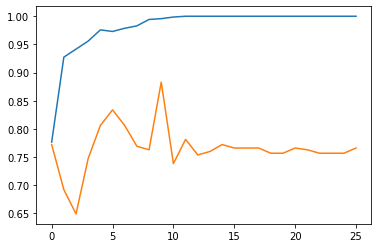

In [37]:
plt.plot(hist3.history["accuracy"])
plt.plot(hist3.history["val_accuracy"])

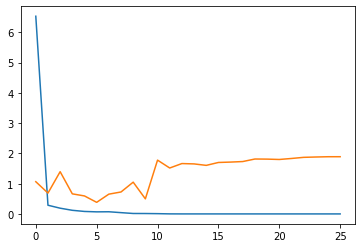

In [38]:
plt.plot(hist3.history["loss"])
plt.plot(hist3.history["val_loss"])

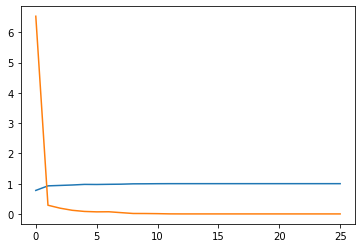

In [39]:
plt.plot(hist3.history["accuracy"])
plt.plot(hist3.history["loss"])

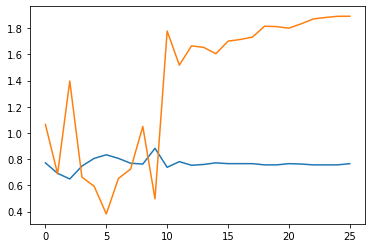

In [40]:
plt.plot(hist3.history["val_accuracy"])
plt.plot(hist3.history["val_loss"])

In [41]:
# PREDECTION OF MODEL ON TEST BATCHES

pred3 = model3.predict(test_batches)
prediction3 = [np.argmax(i) for i in pred3]

In [42]:
score3 = model3.evaluate(test_batches)

11/11 [==============================] - 8s 723ms/step - loss: 1.8906 - accuracy: 0.7662


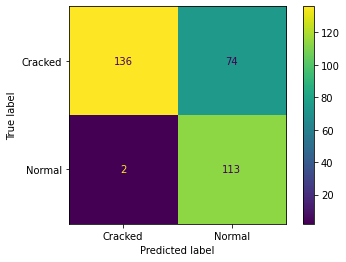

In [43]:
confusion_matrix = confusion_matrix(test_batches.classes, prediction3)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Cracked","Normal"])

cm_display.plot()
plt.show()

In [44]:
# PRECISION
precision_score(test_batches.classes, prediction3)*100

60.42780748663101

In [45]:
# RECALL
recall_score(test_batches.classes, prediction3)*100

98.26086956521739

In [46]:
# F1 SCORE
f1_score(test_batches.classes, prediction3)*100

74.83443708609272

In [47]:
print(classification_report(test_batches.classes, prediction3, target_names=["Cracked","Normal"]))

              precision    recall  f1-score   support



     Cracked       0.99      0.65      0.78       210

      Normal       0.60      0.98      0.75       115



    accuracy                           0.77       325

   macro avg       0.79      0.82      0.76       325

weighted avg       0.85      0.77      0.77       325




In [ ]:
# train_pred3 = model3.predict(train_batches)
# train_prediction3 = [np.argmax(i) for i in train_pred3]
# accuracy_score(train_batches.classes, train_prediction3)*100   #Underfit

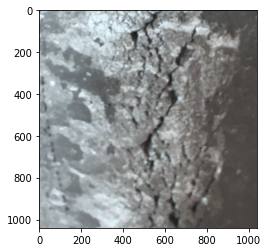

Probabilities of each Class: [0.9200389  0.16197154]

Cracked


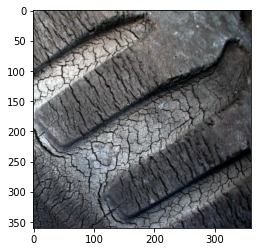

Probabilities of each Class: [0.94149685 0.11240643]

Cracked


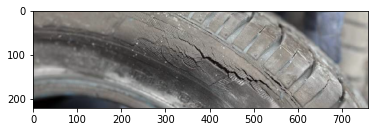

Probabilities of each Class: [0.9237563  0.15207404]

Cracked


In [76]:
def predict(image):
    img = cv2.imread(image)
    plt.imshow(img)
    plt.show()
    #resize = tf.image.resize(img, (50,50))
    resize = cv2.resize(img, (224,224))
    #print(np.expand_dims(resize,0).shape)
    pred = model3.predict(np.expand_dims(resize/255,0))
    print("Probabilities of each Class:",pred[0])
    y_classes = np.argmax(pred)
    if y_classes == 0:
        print("Cracked")
    else:
        print("Normal")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Trials/cr1.jpg")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Trials/cr2.jpg")
predict("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/Trials/cr3.jpg")

In [77]:
test_batches.class_indices

{'cracked': 0, 'normal': 1}

In [ ]:
# mod = load_model("C:/Users/mohit/PROJECTS/Final Year/Wear & Abrasion detection Of Tires/models/resnetweights-11-0.91.h5")